In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [35]:
import yfinance as yf
df= yf.download("AAPL", start="2016-01-02", end="2018-12-30")
df.columns = df.columns.str.strip()
df.columns

[*********************100%***********************]  1 of 1 completed


Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [39]:
df['%change'] = df['Close'].pct_change()
df['200sma'] = df['Close'].rolling(window=200).mean().round(5)
df['50sma'] = df['Close'].rolling(window=50).mean().round(5)

In [43]:
df['Criteria1'] = df['Close'] >= df['200sma']
df['Criteria2'] = (df['50sma'] >= df['200sma'])| df['Criteria1'] ==True

In [47]:
df['Buy&Hold'] = 100* (1+df['%change']).cumprod()
df['200smaModel'] = 100*(1+df['Criteria1'].shift(1)*df['%change']).cumprod()
df['200smaCrossoverModel'] = 100*(1+df['Criteria2'].shift(1)*df['%change']).cumprod()

In [56]:
start_model1 = df['200smaModel'].iloc[200]
end_model1 = df['200smaModel'].iloc[-1]
years = (df['200smaModel'].count()+1 -200)/252
model1_avg_return = (end_model1/start_model1)** (1/years)-1
print('200sma model yields an average of', model1_avg_return*100, '% per year')

200sma model yields an average of 20.47706279568322 % per year


In [57]:
start_model2 = df['200smaCrossoverModel'].iloc[200]
end_model2 = df['200smaCrossoverModel'].iloc[-1]
model2_avg_return = (end_model2/start_model2)** (1/years)-1
print('200smaCrossoverModel model yiels an average of', model2_avg_return*100, '% per year')

200smaCrossoverModel model yiels an average of 14.07510159349512 % per year


In [59]:
start_spx = df['Close'].iloc[200]
end_spx = df['Close'].iloc[-1]
spx_avg_return = (end_spx/start_spx)**(1/years)-1
print('Buy and hold yields an average of', spx_avg_return, '% per year')

Buy and hold yields an average of 0.13876013337483117 % per year


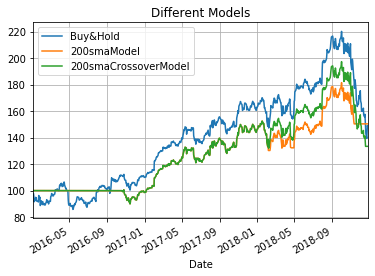

In [60]:
df[['Buy&Hold', '200smaModel', '200smaCrossoverModel']].plot(grid=True, kind = 'line', title = 'Different Models' )